# **Deep Learning Project: Street View Housing Number Digit Recognition**


--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
# The code is written with downloaded data and locally processed, which would not require mouting Google dirve
# but in case for checking if code ability is there, the following 2 lines of code are examples of how to mount Google drive:

# from google.colab import drive
# drive.mount('/content/drive')

## **Importing the necessary libraries**

In [97]:
import h5py # load dataset in h5
import numpy as np # working with numerical operations
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import tensorflow as tf # machine learining model building
import keras # machine learining model building
from keras.utils.np_utils import to_categorical # transforming datasets
from sklearn.metrics import classification_report, confusion_matrix # evaluations
import random
from tensorflow.keras import backend

**Let us check the version of tensorflow.**

In [54]:
print(tf.__version__)

2.3.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [55]:
data = h5py.File(r'SVHN_single_grey1.h5','r')

# splitting the data from the whole H5-file and turning it
for key in list(data.keys()):
    print(key)
    exec(key +' = np.array(data["' + key + '"])')

X_test
X_train
X_val
y_test
y_train
y_val


Check the number of images in the training and the testing dataset.

In [56]:
for key in list(data.keys()):
    if ('test' in key) or ('train' in key):
        print('Number of images in %s: %s' %(key,str(data[key].shape[0])))
    else:
        print('Number of images in %s: %s' %(key,str(data[key].shape[0])))

Number of images in X_test: 18000
Number of images in X_train: 42000
Number of images in X_val: 60000
Number of images in y_test: 18000
Number of images in y_train: 42000
Number of images in y_val: 60000


**Observation:**

For training and model fine tuning, there are a total of 60,000 images, totaling from

- 42,000 training and
- 18,000 test dataset.

For model validation, there is a validation set with 60,000 images.  Overall, there are 120,000 images available.

In proportional terms, there are 50% total images available dataset allotted for training and model fine tuning, which is divided into

- 35% training, and
- 15% testing.

While for model validation, there is 50% of the total available dataset allotted.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

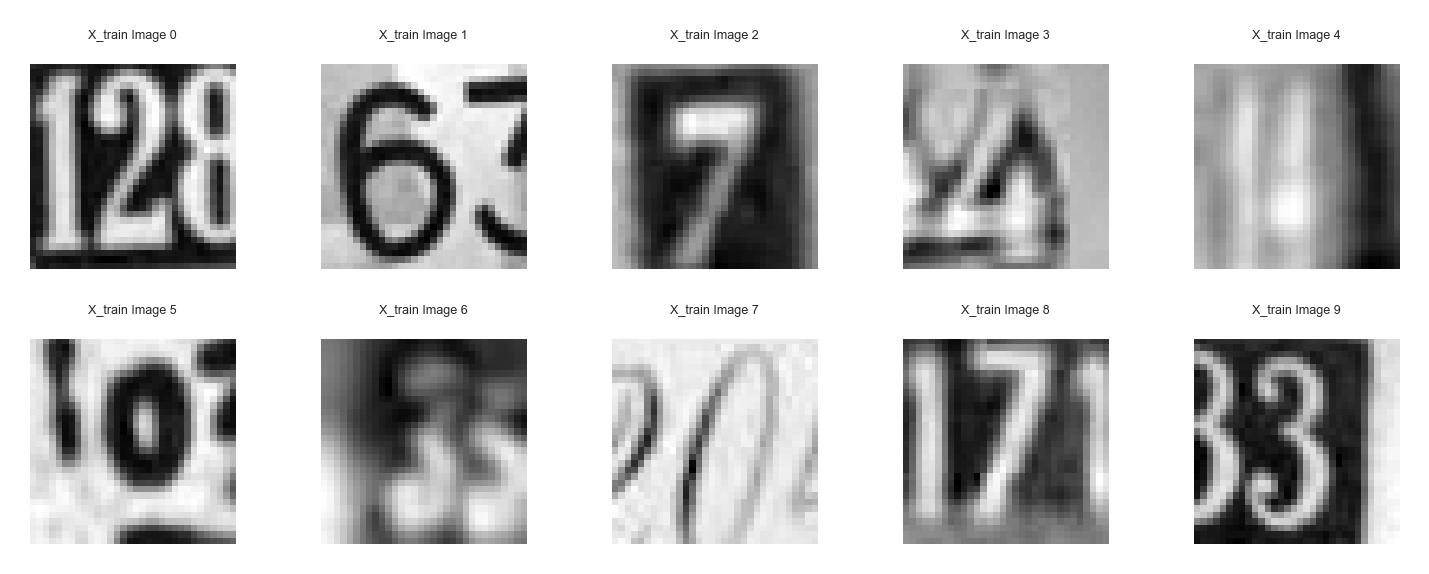

y_train label for image 0: 2
y_train label for image 1: 6
y_train label for image 2: 7
y_train label for image 3: 4
y_train label for image 4: 4
y_train label for image 5: 0
y_train label for image 6: 3
y_train label for image 7: 0
y_train label for image 8: 7
y_train label for image 9: 3


In [57]:
# visualizing the first 10 images in X_train
fig = plt.figure(dpi=300,figsize=(5,2))
for i in range(10):
    fig.add_subplot(2,5,i+1)
    plt.imshow(X_train[i,:,:],cmap='gray'   )
    plt.title('X_train Image %i' %(i),fontsize=3)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.axis('off')
plt.tight_layout()
plt.show()

# printing the first 10 labels in y_train
for i in range(10):
    print('y_train label for image %i: %i' %(i,y_train[i]))
    


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [6]:
print('First image in training data has a shape of',X_train[0,:,:].shape)
print('\nFirst image array (roughly shown, beginning & end, top & buttom):',X_train[0,:,:])
print('\nFirst image array (complete):')
for i in range(X_train[0,:,:].shape[1]):
    print(X_train[0,i,:])

First image in training data has a shape of (32, 32)

First image array (roughly shown, beginning & end, top & buttom): [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]

First image array (complete):
[33.0704 30.2601 26.852  25.8844 28.5421 33.1673 33.9069 31.277  27.3313
 23.9556 21.3518 22.5258 24.2868 31.2322 37.2917 38.1776 30.8902 24.4887
 27.983  23.3641 19.7774 23.0159 24.7168 24.9941 27.5701 38.5474 52.8341
 65.9037 73.5609 71.4471 58.2204 42.9939]
[ 25.2283  25.5533  29.9765  40.96    54.0358  60.7317  57.5965  47.9611
  33.0103  24.3362  24.3793  33.1997  44.1339  61.1815  80.5278  86.1744
  79.7621  66.5893  47.4926  29.7548  21.8804  22.9943  25.2822  26.63

### **Normalize the train and the test data**

In [58]:
# normalizing the 0-255 pixel values to 0 - 1 by dividing values by 255
X_train = X_train/255
X_test = X_test/255

Print the shapes of Training and Test data

In [59]:
# to be able to use the image pixels as input features, they have to be reshaped into "flattened" single vector inputs
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print('Training set has a shape of',X_train.shape)
print('Training set has a shape of',X_test.shape)

Training set has a shape of (42000, 1024)
Training set has a shape of (18000, 1024)


### **One-hot encode output**

In [60]:
y_train = to_categorical(y_train, num_classes=10) # transforming numerical categoricals into one-hot vectors
y_test = to_categorical(y_test, num_classes=10) # transforming numerical categoricals into one-hot vectors
print('Training labels now have the shape of',y_train.shape)
print('Test labels now have the shape of',y_test.shape)

Training labels now have the shape of (42000, 10)
Test labels now have the shape of (18000, 10)


**Observation:**

The input datasets, the training and test datasets, images are 32 pixels-by 32 pixels with only one layer, therefore, they are all gray-scale, rather than RGB-images which would have been given as 3 layers with each layer representing one color.

Because the input dataset is going to be the input as one single vector input into an ANN model, instead of the 32-by-32 pixel images, the images are transformed into single vectors of 1-by-1024. 

The input images  are initially given in image pixels with value ranging from 0 to 255.  However, due to easier processing, especially to
- avoid uneven weight values that would appear to be sparse and high, and
- to be able to utilize activation functions that work best with values ranging from 0 to 1,

it is best to have values normalized to range from 0 to 1.  Therefore, the training and test dataset are normalized to range from 0 to 1.

The labels are given in numerical identification of the number within the image, but for multi-categorical classification model, the labels are now transformed into one-hot vectors, where numerical categories ranging from 0 to 9 are each transformed into a vector of 10 elements, where the location of the element indicates the numerical category.  This would enable the output layer to utilize the activation function softmax.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [61]:
np.random.seed(3)
random.seed(3)
tf.random.set_seed(3)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable. 
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [62]:
input_shape = (1024,) # input shape = (1024, )
num_classes = 10      # number of classes
model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(64,input_shape=input_shape,activation='relu'), # 64 nodes, relu activation, the input shape = (1024, )
     tf.keras.layers.Dense(32,activation='relu'),                         # 32 nodes, the relu activation
     tf.keras.layers.Dense(num_classes, activation='softmax')])           # activation as 'softmax', number of nodes equal to the number of classes, i.e., 10

# loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

# rename the model
nn_model_1 = model

# print model summary
nn_model_1.summary()

# Fit on the train data, validation split of 0.2, batch size = 128, verbose = 1, epochs = 20
batch_size = 128
validation_split = 0.2
epoch = 20
history_nn_model_1 = nn_model_1.fit(x=X_train,
                               y=y_train,
                               batch_size=batch_size,
                               epochs=epoch,
                               validation_split=validation_split,
                               verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                65600     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
263/263 [==============================] - 0s 2ms/step - loss: 2.3065 - accuracy: 0.1088 - val_loss: 2.2901 - val_accuracy: 0.1435
Epoch 2/20
263/263 [==============================] - 0s 2ms/step - loss: 2.1899 - accuracy: 0.1863 - val_loss: 2.0425 - val_accuracy: 0.2298
Epoch 3/20
263/263 [==============================] - 0s 2ms/step - loss: 1.9666 - accuracy: 0.2

### **Plot the Training and Validation Accuracies and write down your Observations.**

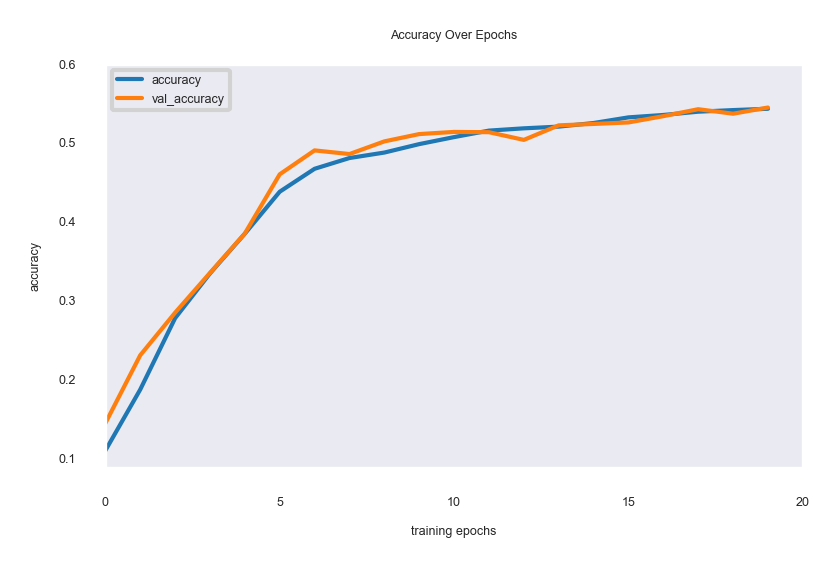

In [86]:
fig = plt.figure(dpi=300,figsize=(3,1.75))
for key in history_nn_model_1.history.keys():
    if 'accuracy' in key:
        plt.plot(history_nn_model_1.history[key],linewidth=1,label=key)
plt.ylabel('accuracy',fontsize=3)
plt.xlabel('training epochs',fontsize=3)
plt.xticks(fontsize=3)
plt.yticks(fontsize=3,ticks=np.arange(0.1,0.7,0.1),labels=np.round(np.arange(0.1,0.7,0.1),decimals=1))
plt.xlim([0,len(history_nn_model_1.history[key])])
plt.title('Accuracy Over Epochs',fontsize=3)
plt.legend(fontsize=3)
plt.show()

**Observations:**

Performance:
1. The validation accuracy behavior tracks that of the training accuracy throughout the training epochs, which indicates that the model is able to generalize enough to have similar performance on the training set and the validation set.
2. The accurracies of both training and validation, at the end of the set 20 epochs, seem to be reaching around 0.55 and tapering out, that is about 55% accurate on images given, which is about roughly half of the images being inaccurately categorized and this kind of performance is almost like a toss of a coin and is not what is considered as good performance.
3. From the verbose 1 over the training epochs, which also provided information about the loss over the epoch, where the loss dropped rather quickly early in the training process, but the subsequent drop slowed down, resulting loss hovering around 1.4.  This may be an indication of that this particular neural network model may have reached its limit in the ability to minimize the loss function.

Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [65]:
np.random.seed(25)
random.seed(25)
tf.random.set_seed(25)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [66]:
input_shape = (1024,) # input shape = (1024, )
num_classes = 10 # number of classes
model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(256,input_shape=input_shape,activation='relu'),
     tf.keras.layers.Dense(128,activation='relu'),
     tf.keras.layers.Dropout(rate=0.2),
     tf.keras.layers.Dense(64,activation='relu'),
     tf.keras.layers.Dense(64,activation='relu'),
     tf.keras.layers.Dense(32,activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dense(num_classes, activation='softmax')]) # activation as 'softmax', number of nodes equal to the number of classes, i.e., 10

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

# rename the model
nn_model_2 = model

# print model summary
nn_model_2.summary()

# Fit on the train data, validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20
batch_size = 128
validation_split = 0.2
epoch = 30
history_nn_model_2 = nn_model_1.fit(x=X_train,
                               y=y_train,
                               batch_size=batch_size,
                               epochs=epoch,
                               validation_split=validation_split,
                               verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)               

### **Plot the Training and Validation Accuracies and write down your Observations.**

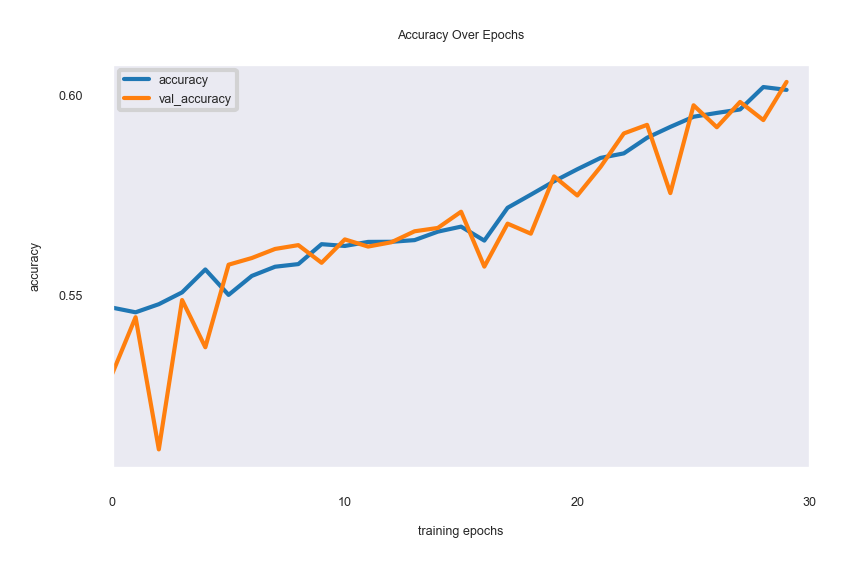

In [84]:
fig = plt.figure(dpi=300,figsize=(3,1.75))
for key in history_nn_model_2.history.keys():
    if 'accuracy' in key:
        plt.plot(history_nn_model_2.history[key],linewidth=1,label=key)
plt.ylabel('accuracy',fontsize=3)
plt.xlabel('training epochs',fontsize=3)
plt.xticks(fontsize=3)
plt.yticks(fontsize=3)
plt.xlim([0,len(history_nn_model_2.history[key])])
plt.title('Accuracy Over Epochs',fontsize=3)
plt.legend(fontsize=3)
plt.show()

**Observations:**

Performance:
1. In comparison to the previous model, this model has more training with 30 epochs, a deeper model with more layers and wider layers.
2. The overall validation accuracy behavior tracks that of the training accuracy throughout the training epochs.  But the big zig-zag dips in the accuracy of the validation, it indicates that the model does not always generalize well due to overfitting on the training set.
3. The accurracies of both training and validation, at the end of the set 30 epochs, seem to be reaching around 0.60 and seems to be in the projection to continual improvement. Roughly 60-to-40 accuracy in recognizing the images class. The mis-categorization is too high. This kind of performance is not considered a good performance. Longer training with higher epochs could improve the accuracy, however, as mentioned in item 2, it is likely that longer training may just encourage the undesirable outcome of overfitting on the training set.
4. From the verbose 1 over the training epochs, which also provided information about the loss over the epoch, where the loss dropped rather quickly early in the training process, but the subsequent drop slowed down, resulting loss hovering around 1.2.  This may be an indication of that this particular neural network model may have reached its limit in the ability to minimize the loss function.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [68]:
# prediction
predict_nn_model_2 = nn_model_2.predict(X_test)

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [69]:
# single label conversion in order to compare for classification report & confusion matrix
y_test = np.argmax(y_test,axis=1)
y_pred_nn_model_2 = np.argmax(predict_nn_model_2,axis=1) # predict (highest probability)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

==== Classification report ====

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1814
           1       0.10      0.95      0.18      1828
           2       0.00      0.00      0.00      1803
           3       0.00      0.00      0.00      1719
           4       0.00      0.00      0.00      1812
           5       0.00      0.00      0.00      1768
           6       0.00      0.00      0.00      1832
           7       0.00      0.00      0.00      1808
           8       0.00      0.00      0.00      1812
           9       0.12      0.06      0.08      1804

    accuracy                           0.10     18000
   macro avg       0.02      0.10      0.03     18000
weighted avg       0.02      0.10      0.03     18000

==== Confusion matrix ====

 [[   0 1705    0    0    0    0    0    0    0  109]
 [   0 1730    0    0    0    0    0    0    0   98]
 [   0 1745    0    0    0    0    0    0    0   58]
 [   0 1652    0   

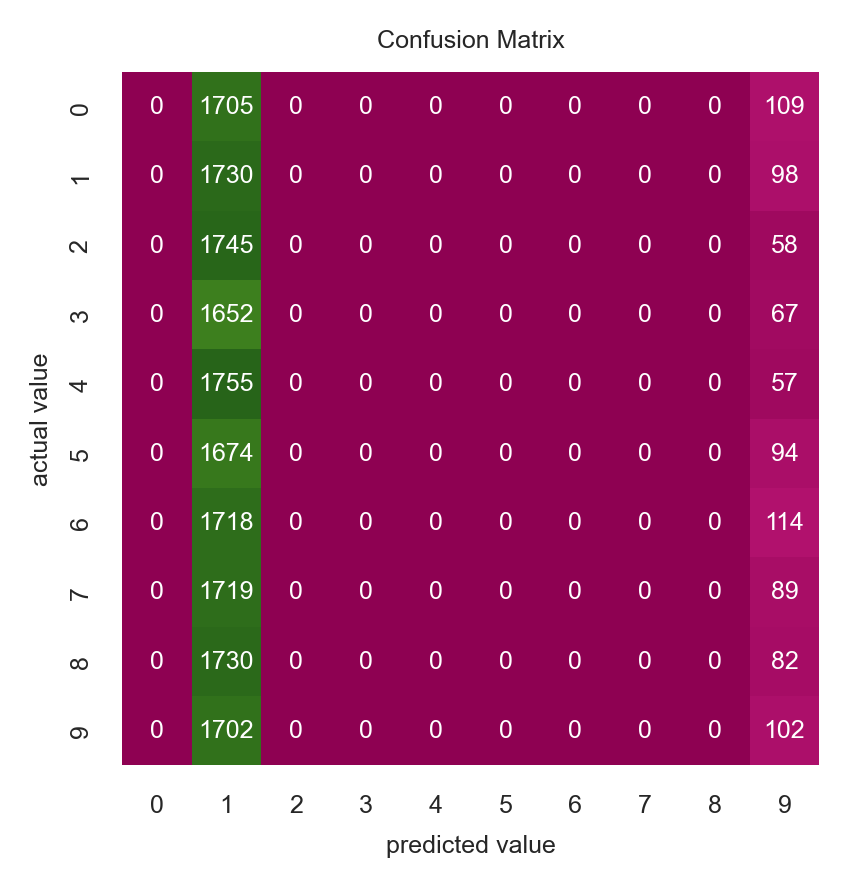

In [70]:
# classification report
print('==== Classification report ====\n\n',classification_report(y_test,y_pred_nn_model_2,zero_division=0))

# confusion matrix
print('==== Confusion matrix ====\n\n',confusion_matrix(y_test,y_pred_nn_model_2))

fig = plt.figure(dpi=300,figsize=(3,3))
sns.set_style('dark')
cm = confusion_matrix(y_test,y_pred_nn_model_2)
sns.heatmap(cm,annot=True,cmap='PiYG',fmt='g',cbar=False,annot_kws={"size":6})
plt.title('Confusion Matrix',fontsize=6)
plt.xlabel('predicted value',fontsize=6)
plt.ylabel('actual value',fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

# **Final Observations:**

1. Classification report:
    * Precision indicating true positive correctly classified overall true & false positive cases, and precision values are all very low.  The precision value is highest at around around 10 - 12% for classes "1" and "9".  All the other classes have precision around zero, which hints at false positive being too high that lowers the precision, resulting in very poor performance. In a well-performing model, the values should be close to 1 (for 100%).
    * Recall indicating true positive correctly classified overall true positive & false negative.  Recall value is only high for class "1" around 95% and 6% for class "9", and all other classes are around zero, which informs that most of the classes have high false negative rate, leading to poor performance. In a well-performing model, the values should be close to 1 (for 100%).
    * The f1-score is the harmonic mean of the precision and recall, which is expectedly higher for class "1" at 18% and with 8% for classes "9". All of the classes are much lower than the value of 1, denoting that the model does a poor job in classification.  In a well-performing model, the values should be close to 1 (for 100%).
    * Support values show that the dataset for all classes are roughly evenly distributed, so there is no imbalanced data issue, that is to say, there is no over representation of any class in the dataset.
2. Confusion matrix:
    * According to scikit-learn documentation (reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), the rows are actual label, while the columns are predicted labels.  And from the confusion matrix, it is clear that the model has the tendency to classify most images as one single label (class "1"), then the other label (class "9"). In the most likely classified label (class "1"), the model had eventually predicted correctly with a high rate on the correct label, but since the errors are so high that this does not make the overall performance better.  For a well performing model, the matrix should have its diagonal elements with vastly high values, while all non-diagonal elements with zero or comparatively low values.
3. Performance:
    * The classification report and the confusion matrix both confirmed the observations made on the performance of this ANN model.  The training and validation accuracy both are around 60% at the end of the training, which is quite low.  The details of the performance could be seen in the low values in classification precision, recall and f1-score.
    * Due to the relatively large zig-zaggy drops of validation accuracy over the training epochs, which indicate the likelihood of this ANN model to overfit on the training dataset and less able to generalize at times.
4. Comparison to the first ANN model:
    * The first ANN model is shallower and not much narrower on most of the beginning 3 layers.  Though, the first fully-connected ANN model did not eventually produce a well-performing model, it balanced the bias and variance well over the training with expected training and validation accuracy tapering off towards similar values.
    * The second fully-connected ANN model is deeper and first 3 layers are much wider.  Intuitively, this should be learning more "details" of the data information.  However, it is not the case for images flattened into a vector, because there is no reference in local spatiality and the learning is too focused on specifics of the pixel representations rather than the idea of the image.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [146]:
data = h5py.File(r'SVHN_single_grey1.h5','r')

# splitting the data from the whole H5-file and turning it
for key in list(data.keys()):
    print(key)
    exec(key +' = np.array(data["' + key + '"])')

X_test
X_train
X_val
y_test
y_train
y_val


Check the number of images in the training and the testing dataset.

In [147]:
for key in list(data.keys()):
    if ('test' in key) or ('train' in key):
        print('Number of images in %s: %s' %(key,str(data[key].shape[0])))
    else:
        print('Number of images in %s: %s' %(key,str(data[key].shape[0])))

Number of images in X_test: 18000
Number of images in X_train: 42000
Number of images in X_val: 60000
Number of images in y_test: 18000
Number of images in y_train: 42000
Number of images in y_val: 60000


**Observation:**

For training and model fine tuning, there are a total of 60,000 images, totaling from

- 42,000 training and
- 18,000 test dataset.

For model validation, there is a validation set with 60,000 images.  Overall, there are 120,000 images available.

In proportional terms, there are 50% total images available dataset allotted for training and model fine tuning, which is divided into

- 35% training, and
- 15% testing.

While for model validation, there is 50% of the total available dataset allotted.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [148]:
print('First image in training data has a shape of',X_train[0,:,:].shape)
print('\nFirst image array (roughly shown, beginning & end, top & buttom):',X_train[0,:,:])
print('\nFirst image array (complete):')
for i in range(X_train[0,:,:].shape[1]):
    print(X_train[0,i,:])

First image in training data has a shape of (32, 32)

First image array (roughly shown, beginning & end, top & buttom): [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]

First image array (complete):
[33.0704 30.2601 26.852  25.8844 28.5421 33.1673 33.9069 31.277  27.3313
 23.9556 21.3518 22.5258 24.2868 31.2322 37.2917 38.1776 30.8902 24.4887
 27.983  23.3641 19.7774 23.0159 24.7168 24.9941 27.5701 38.5474 52.8341
 65.9037 73.5609 71.4471 58.2204 42.9939]
[ 25.2283  25.5533  29.9765  40.96    54.0358  60.7317  57.5965  47.9611
  33.0103  24.3362  24.3793  33.1997  44.1339  61.1815  80.5278  86.1744
  79.7621  66.5893  47.4926  29.7548  21.8804  22.9943  25.2822  26.63

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [149]:
x_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
x_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

Normalize inputs from 0-255 to 0-1

In [150]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

Print New shape of Training and Test

In [151]:
print('Training set has a shape of',x_train.shape)
print('Training set has a shape of',x_test.shape)

Training set has a shape of (42000, 32, 32, 1)
Training set has a shape of (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [152]:
y_train = to_categorical(y_train, num_classes=10) # transforming numerical categoricals into one-hot vectors
y_test = to_categorical(y_test, num_classes=10) # transforming numerical categoricals into one-hot vectors
print('Training labels now have the shape of',y_train.shape)
print('Test labels now have the shape of',y_test.shape)

Training labels now have the shape of (42000, 10)
Test labels now have the shape of (18000, 10)


**Observation:**

The input datasets, the training and test datasets, images are 32 pixels-by 32 pixels with only one layer, therefore, they are all gray-scale, rather than RGB-images which would have been given as 3 layers with each layer representing one color.

Because the input dataset is going to be the input into a CNN model, instead of the 32-by-32 pixel images, where CNN model requires one more dimension, the input datasets are transformed into (number-of-images)-by-32-by-32-by-1.

The input images are initially given in image pixels with value ranging from 0 to 255.  However, due to easier processing, especially to
- avoid uneven weight values that would appear to be sparse and high, and
- to be able to utilize activation functions that work best with values ranging from 0 to 1,

it is best to have values normalized to range from 0 to 1.  Therefore, the training and test dataset are normalized to range from 0 to 1.

The labels are given in numerical identification of the number within the image, but for multi-categorical classification model, the labels are now transformed into one-hot vectors, where numerical categories ranging from 0 to 9 are each transformed into a vector of 10 elements, where the location of the element indicates the numerical category.  This would enable the output layer to utilize the activation function softmax.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [79]:
np.random.seed(27)
random.seed(27)
tf.random.set_seed(27)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [80]:
input_shape = (32,32,1)
num_classes = 10
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same',input_shape=input_shape),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same'),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

# loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

# rename the model
cnn_model_1 = model

# print model summary
cnn_model_1.summary()

# Fit the model: validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20
batch_size = 32
validation_split = 0.2
epoch = 20
history_cnn_model_1 = cnn_model_1.fit(x=x_train,
                               y=y_train,
                               batch_size=batch_size,
                               epochs=epoch,
                               validation_split=validation_split,
                               verbose=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)               

### **Plot the Training and Validation Accuracies and Write your observations.**

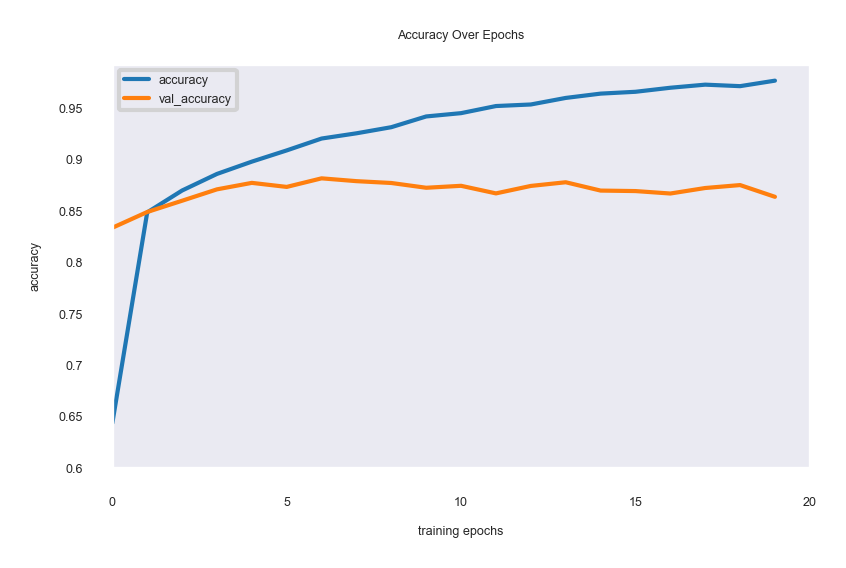

In [96]:
fig = plt.figure(dpi=300,figsize=(3,1.75))
for key in history_cnn_model_1.history.keys():
    if 'accuracy' in key:
        plt.plot(history_cnn_model_1.history[key],linewidth=1,label=key)
plt.ylabel('accuracy',fontsize=3)
plt.xlabel('training epochs',fontsize=3)
plt.xticks(fontsize=3)
plt.yticks(fontsize=3,ticks=np.arange(0.6,1,0.05),labels=np.round(np.arange(0.6,1,0.05),decimals=2))
plt.xlim([0,len(history_cnn_model_1.history[key])])
plt.title('Accuracy Over Epochs',fontsize=3)
plt.legend(fontsize=3)
plt.show()

**Observations:**

Performance:
1. In comparison to the previous ANN models, this model is a CNN model trained over 30 epochs, the layers process more complex information.
2. The overall validation accuracy behavior has been performing very stably hovering around 87% over the training epochs, while the training accuracy improves over the training epochs and seems to be tapering off to reach near 98%.  The accuracy of the validation performs consistently, but over the course of the training epochs, it is much lower than the training accuracy, and even seems to be decreasing ever so slightly.  This indicates that the model achieved a consistent generalization, as seen in the consistent validation accuracy and trending decreasing, but continues to improve its learning on the training dataset while slightly compromising on the generalization.  This leads to the model trending on overfitting on the training set, especially observing that the validation accuracy has a very slight decreasing trend.
3. Validation accuracy peaked around epoch 7, while training accuracy continued to improve.  This suggests that for this particular CNN model, to balance the bias and variance, the training should stop around epoch 7 to not overfit on the training data.
4. The accurracies of both training and validation, at the end of the set 30 epochs, have reached relatively high value, where validation accuracy is at around 87% and that of training at around 98%.  The model performs overall much better in comparison to the previous ANN models.
5. From the verbose 1 over the training epochs, which also provided information about the loss over the epoch, where the loss dropped rather quickly early in the training process, but the subsequent drop slowed down, resulting validation loss hovering around 80% and slighly trends growing, while test loss is around 7% and trends decreasing.  This model is likely trending overfitting on training dataset.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [160]:
# clearing model backend history
backend.clear_session()

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [161]:
np.random.seed(65)
random.seed(65)
tf.random.set_seed(65)

input_shape = (32,32,1)
num_classes = 10
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same',input_shape=input_shape),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same'),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same'),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same'),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

# categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

# rename the model
cnn_model_2 = model

# print model summary
cnn_model_2.summary()

# Fit the model: validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30
batch_size = 128
validation_split = 0.2
epoch = 30
history_cnn_model_2 = cnn_model_2.fit(x=x_train,
                               y=y_train,
                               batch_size=batch_size,
                               epochs=epoch,
                               validation_split=validation_split,
                               verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9

### **Plot the Training and Validation accuracies and write your observations.**

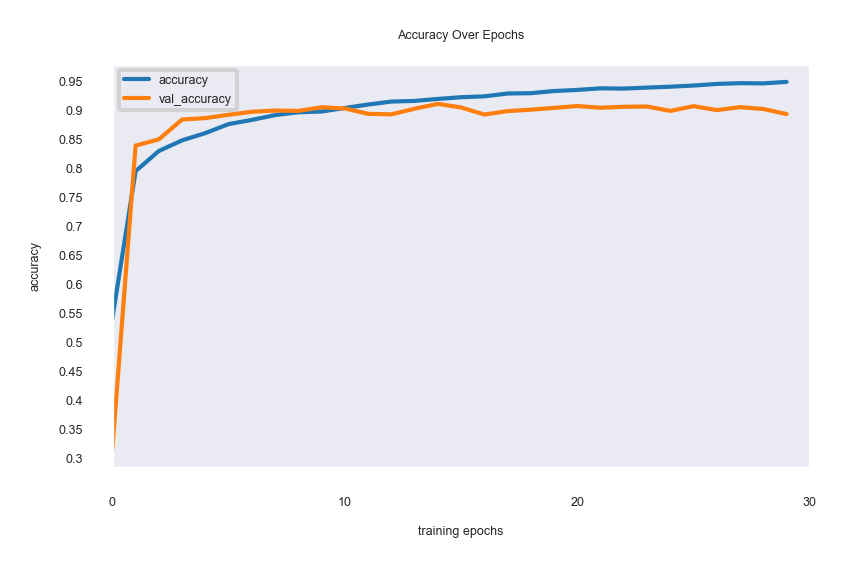

In [162]:
# plot training accuracy
fig = plt.figure(dpi=300,figsize=(3,1.75))
for key in history_cnn_model_2.history.keys():
    if 'accuracy' in key:
        plt.plot(history_cnn_model_2.history[key],linewidth=1,label=key)
plt.ylabel('accuracy',fontsize=3)
plt.xlabel('training epochs',fontsize=3)
plt.xticks(fontsize=3)
plt.yticks(fontsize=3,ticks=np.arange(0.3,1,0.05),labels=np.round(np.arange(0.3,1,0.05),decimals=2))
plt.xlim([0,len(history_cnn_model_2.history[key])])
plt.title('Accuracy Over Epochs',fontsize=3)
plt.legend(fontsize=3)
plt.show()

**Observations:**

Performance:
1. In comparison to the previous CNN model, this model is a deeper CNN model with more layers and trained longer with 30 epochs.
2. The overall validation accuracy behavior almost tracks the training epochs.  However, while the training accuracy improves over the training epochs reach near 95% at the end of the training, the accuracy of the validation peaked around epoch 10 - 15 and trending to decrease little by little thereafter. This leads to the model trending on overfitting on the training set after epoch 10 - 15, especially observing that the validation accuracy has a very slight decreasing trend.
3. Validation accuracy peaked around epoch 10 - 15, while training accuracy continued to improve.  This suggests that for this particular CNN model, to balance the bias and variance, the training should stop around epoch 10 - 15 to not overfit on the training data.
4. The accurracies of both training and validation, at the end of the set 30 epochs, have reached relatively high value, where validation accuracy is at around 89% and that of training at around 95%.  The model performs overall slightly better in comparison to the previous CNN model judging on the validation accuracy, but also especially in terms of balancing bias and validation.
5. From the verbose 1 over the training epochs, which also provided information about the loss over the epoch, where the loss dropped rather quickly early in the training process, but the subsequent drop slowed down.  While the training loss continued to drop slowly, the validation loss started to increase slightly after epoch 9 - 11.  This suggests that this CNN model is likely trending overfitting on training dataset, and, as suggested in item 3 regarding balacing the bias and variance, the training could stop at around epoch 10 - 15.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.** 

In [163]:
# make prediction
predict_cnn_model_2 = cnn_model_2.predict(x_test)

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [167]:
# converting one-hot back in to class labelss
y_test = np.argmax(y_test,axis=1) 
predict_cnn_model_2 = np.argmax(predict_cnn_model_2,axis=1) # predict (highest probability)

### **Write your final observations on the performance of the model on the test data.**

==== Classification report ====

               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1814
           1       0.89      0.90      0.90      1828
           2       0.94      0.89      0.91      1803
           3       0.92      0.84      0.88      1719
           4       0.94      0.91      0.92      1812
           5       0.92      0.89      0.90      1768
           6       0.88      0.88      0.88      1832
           7       0.84      0.94      0.89      1808
           8       0.90      0.89      0.89      1812
           9       0.90      0.88      0.89      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000

==== Confusion matrix ====

 [[1736   14    2    2    3    1   15   13   10   18]
 [  27 1651    7    8   30    6   13   77    7    2]
 [  26   21 1605   14   15    4    5   81   17   15]
 [  10   18   24 14

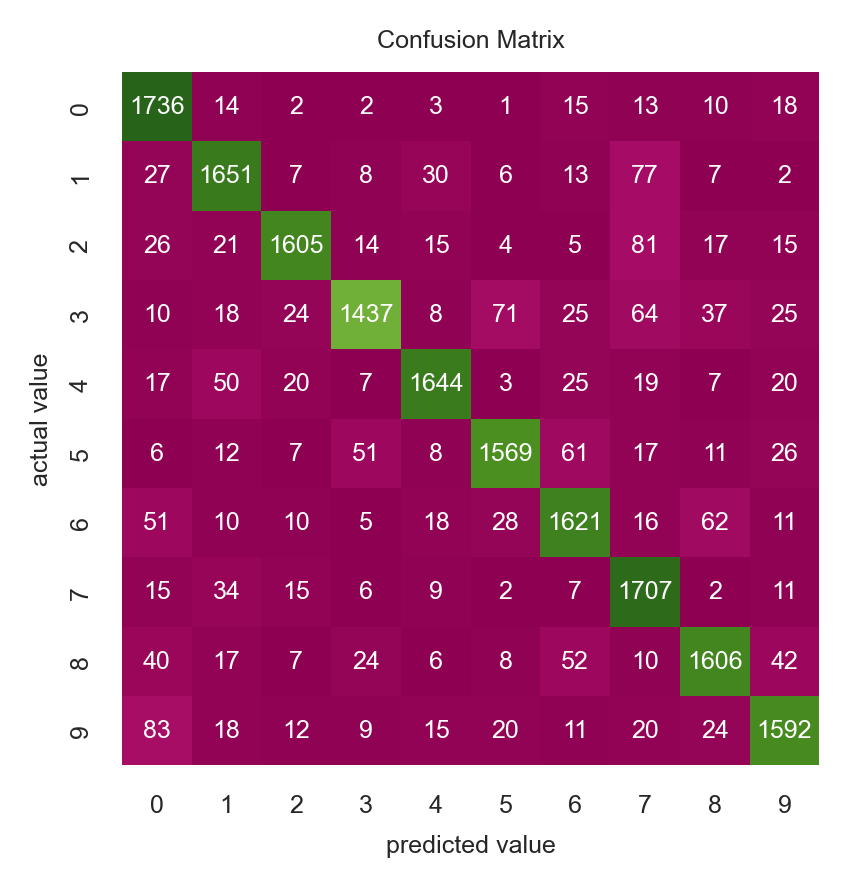

In [168]:
# classification report
print('==== Classification report ====\n\n',classification_report(y_test,predict_cnn_model_2,zero_division=0))

# confusion matrix
print('==== Confusion matrix ====\n\n',confusion_matrix(y_test,predict_cnn_model_2))

fig = plt.figure(dpi=300,figsize=(3,3))
sns.set_style('dark')
cm = confusion_matrix(y_test,predict_cnn_model_2)
sns.heatmap(cm,annot=True,cmap='PiYG',fmt='g',cbar=False,annot_kws={"size":6})
plt.title('Confusion Matrix',fontsize=6)
plt.xlabel('predicted value',fontsize=6)
plt.ylabel('actual value',fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

**Final Observations:**

1. Classification report:
    * Precision indicating true positive correctly classified overall true & false positive cases, and precision value are all relatively high.  The precision values range around around 86 - 94% for all the classes.  In a well-performing model, the values should be close to 1 (for 100%), which indicates that the false-positive cases are relatively low.
    * Recall indicating true positive correctly classified overall true positive & false negative.  Recall values range 84 - 96% for all classes, which informs that most of the classes have relatively low false-negative cases, leading to relatively good performance. In a well-performing model, the values should be close to 1 (for 100%), and this CNN model performance has demonstrated recall values that are relatively close to 1.
    * The f1-score is the harmonic mean of the precision and recall, which is expectedly high, ranging 88 - 92% for all the classes.  The high harmonic mean demonstrates that the model does a relatively good job in classification, where the values are expected to be as close to 1 (for 100%) as possible.
    * Support values show that the dataset for all classes are roughly evenly distributed, so there is no imbalanced data issue, that is to say, there is no over representation of any class in the dataset.
2. Confusion matrix:
    * According to scikit-learn documentation (reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), the rows are actual label, while the columns are predicted labels.  For a well performing model, the matrix should have its diagonal elements with vastly high values, while all non-diagonal elements with zero or comparatively low values.  And in the case of this CNN model, it does demonstrate noticeably high rate in correct classification of images, as shown in the diagonal elements.
3. Performance:
    * The classification report and the confusion matrix both confirmed the observations made on the performance of this CNN model.  The validation accuracy is around 90%, which is quite high. The relatively high accuracy is also seen more detailed in the high values of classification precision, recall and f1-score.
    * Due to the divergence of the validation accuracy to that of training, around epoch 10 - 15, and that the training accuracy continued to improve while the validation accuracy started to drop slightly over the training, it indicates that this CNN model is starting to overfit on the training data around epoch 10 - 15.
4. Comparison to the previvous models:
    * The previous CNN model is comparatively shallower with fewer layers.  The training and validation accuracy of the previous CNN indicates the model was overfitting on training data.  In comparison, this deeper CNN model handles the trade-off of bias and variance better, however, it still exhibits the tendency to overfit on the training data when training continues on further.
    * The previous fully-connected ANN models, especially the second ANN model, have much wider layers, but unable to learn the "idea" of the object to be classified, resulting in poor performance.  In comparison, both of the CNN models perform much better in learning the "idea" of the object to be classified, being able to comprehend object local spatiality.  However, to the complexity of the operations on each layers in the CNN models, the trainings took vastly longer than that of the fully connected ANNs.  The lengthened training is especially noticeable with this current deeper CNN model.

## **Choosing the Final Model**
* Write about which approach you are choosing as the final solution and why.

Without having to test out different architectures of CNN models and tune them and waiting for the trainings to be executed, the last CNN model (the fourth and the deeper CNN model) informs that the model performance is likely to be better if a CNN model were:
1. deeper with more 2D convolutional layers, as it seems to be able to capture and extract more information from the input images in comparison to the shallower CNN model,
2. to gradually grow and gradually shrink the output size of the layers through the 2D convolutional layers by carefully designing the paddings and pooling settings, image object information would be learned better as seen in comparison to the shallower and faster shrinking width CNN, and
3. to train with some condition to monitor the validation accuracy and loss in comparison to those of training, so that once the validation accuracy and loss start to indicate overfitting in relation to the values in training, that the model could stop training and retain the the best performance of the model without starting to overfit on training data.  This is especially noticeable in both of the CNNs, though improved in the second deeper CNN.

The image number recognition model solution I choose would be the modification of the second CNN model, where
* I would add in conditions where the CNN model would have the mechanisms to stop training when overfitting on the training dataset starts to occur, as mentioned in the above observation item 3.
* I would also experiment and fine tune the leaky ReLU layers with different slope values to see if there could be a better bias-variance balance.
* I would experiment with slightly deeper CNN according to methods described in the above observation item 1 and 2.
* I would try different widths on layers with the method described in observation item 2 to see if the performance would improve, that is to say, to see if the model would be able to improve its learning of the object on the image.